In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Plotting contours_0.txt
lines.shape: (1021, 2)
centroid.shape: (1, 2)
RMS error: 166.31
Plotting contours_1.txt
lines.shape: (361, 2)
centroid.shape: (1, 2)
RMS error: 60.07


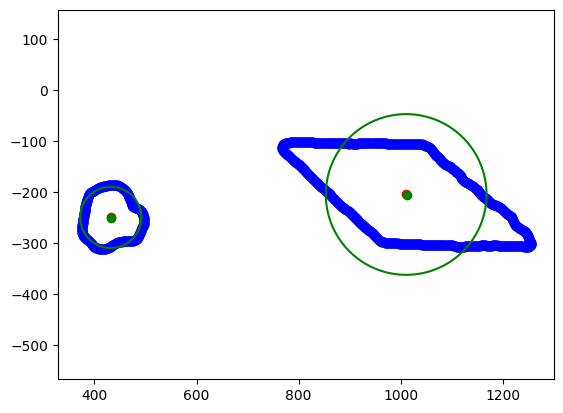

In [29]:
plt.axis("equal")
for i in range(2):
    print(f"Plotting contours_{i}.txt")
    with open(f"../contours_{i}.txt", "r") as f:
        lines = f.readlines()
        lines = [line.strip().removeprefix("[").removesuffix("]")
                 for line in lines]
        lines = [line.split() for line in lines]
        lines = [[j, int(x), -int(y)] for j, (x, y) in enumerate(lines)]
        lines = np.array(lines)

        contour = np.array([[line] for line in lines[:, 1:]])

        M = cv2.moments(contour)

        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroid = np.array([[cX, cY]])
        diff = lines[:, 1:] - centroid
        r_hat = np.linalg.norm(diff, axis=1)
        r_hat_mean = np.mean(r_hat)

        center, radius = cv2.minEnclosingCircle(contour)
        print(f"lines.shape: {lines[:, 1:].shape}")
        print(f"centroid.shape: {centroid.shape}")
        rms_error = np.sqrt(np.mean(np.linalg.norm(diff, axis=1) ** 2))
        print(f"RMS error: {rms_error:.2f}")

        plt.scatter(lines[:, 1], lines[:, 2], color="blue")
        plt.plot(cX, cY, color="red", marker="o")

        # Plot circle
        circle = plt.plot(center[0], center[1], color="green", marker="o")
        p = np.array([[r_hat_mean * np.cos(t), r_hat_mean * np.sin(t)]
                     for t in np.linspace(0, 2 * np.pi, 100)])
        plt.plot(p[:, 0] + cX, p[:, 1] + cY, color="green")